##  Word2Vec




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.metrics import *
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')
random.seed(1228)

%matplotlib inline

Sentiment analysis for tweets. 

Load and preprocess the text.

In [ ]:
from pymystem3 import Mystem
import re


m = Mystem()


regex = re.compile("[А-Яа-я:=!\)\()A-z\_\%/|]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""



def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "


In [ ]:
df_neg = pd.read_csv("negative.csv", sep=';', header = None, usecols = [3])
df_pos = pd.read_csv("positive.csv", sep=';', header = None, usecols = [3])
df_neg['sent'] = 'neg'
df_pos['sent'] = 'pos'
df_pos['text'] = df_pos[3]
df_neg['text'] = df_neg[3]
df = pd.concat([df_neg, df_pos])
df = df[['text', 'sent']]
%time df.text = df.text.apply(words_only)
%time df.text = df.text.apply(lemmatize)

In [ ]:
df_pos = pd.read_csv("positive.csv", sep=';', header = None, usecols = [3])
df_pos.tail()

,3
114906,"Спала в родительском доме, на своей кровати......"
114907,RT @jebesilofyt: Эх... Мы немного решили сокра...
114908,"Что происходит со мной, когда в эфире #proacti..."
114909,"""Любимая,я подарю тебе эту звезду..."" Имя како..."
114910,@Ma_che_rie посмотри #непытайтесьпокинутьомск ...


In [ ]:
# Data load for Windows users
df = pd.read_csv('processed_text.csv', index_col = 0)

In [ ]:
print(df.shape)
#df.head()

(226834, 2)


In [ ]:
df.tail()

,text,sent
114906,спать в родительский дом на свой кровать просы...,pos
114907,RT jebesilofyt: эх мы немного решать сокращать...,pos
114908,что происходить со я когда в эфир proactivefm ...,pos
114909,любимый я подарить ты этот звезда имя какой зв...,pos
114910,Ma_che_rie посмотреть непытайтесьпокинутьомск ...,pos


In [ ]:
texts = [df.text.iloc[i].split() for i in range(len(df))]

## Model training with gensim



In [ ]:
%%time
from gensim.models import Word2Vec
model = Word2Vec(texts, size=300, window=5, min_count=5, workers=4)
model.save("word2v.model")

#model = Word2Vec.load("word2v.model") 

CPU times: user 1min 4s, sys: 533 ms, total: 1min 5s
Wall time: 38.3 s


In [ ]:
model.most_similar("школа")

[('шк', 0.8931280970573425),
 ('универ', 0.8149076700210571),
 ('больница', 0.7876285314559937),
 ('школа)', 0.7747821807861328),
 ('среда', 0.7606973648071289),
 ('колледж', 0.7596842646598816),
 ('суббота', 0.744538426399231),
 ('школа(', 0.732274055480957),
 ('понедельник', 0.7230367660522461),
 ('воскресение', 0.7071605920791626)]

In [ ]:
model.most_similar("работа")

[('учеба', 0.7752535939216614),
 ('обед', 0.7602897882461548),
 ('часы', 0.7383496761322021),
 ('опаздывать', 0.7287635207176208),
 ('тренировка', 0.712971031665802),
 ('кататься', 0.6882541179656982),
 ('занятие', 0.6804410219192505),
 ('поезд', 0.6776019334793091),
 ('путь', 0.6743870973587036),
 ('завтрак', 0.6681668162345886)]

In [ ]:
model.most_similar("отпуск")

[('чемодан', 0.8200064897537231),
 ('перерыв', 0.8152667284011841),
 ('поездка', 0.808070719242096),
 ('март', 0.7810190916061401),
 ('июль', 0.7791746854782104),
 ('ожидание', 0.7779313921928406),
 ('режим', 0.7725270986557007),
 ('сентябрь', 0.7685226202011108),
 ('екб', 0.7677886486053467),
 ('будни', 0.7671849727630615)]

In [ ]:
vec = (model['университет'] - model['студент'] + model['школьник'])/3
model.wv.similar_by_vector(vec)

[('университет', 0.8398834466934204),
 ('поступление', 0.8237471580505371),
 ('мисс', 0.7967935800552368),
 ('конгениальность!!!', 0.7894983291625977),
 ('министерство', 0.7552711367607117),
 ('трусы', 0.745606541633606),
 ('текстовый', 0.7423714399337769),
 ('покопаться', 0.7359415292739868),
 ('постпред', 0.735143780708313),
 ('нато', 0.7308174967765808)]

In [ ]:
model.doesnt_match("выходные отдых лето работа".split())

'лето'

### Word visualization

In [ ]:
top_words = []
from nltk import FreqDist
fd = FreqDist()
for text in texts:
    fd.update(text)
for i in fd.most_common(500):
    top_words.append(i[0])
print(top_words)

['я', 'не', 'и', 'в', 'на', 'что', 'RT', 'а', 'http://t', 'быть', 'ты', 'с', 'как', 'то', 'у', 'это', ':(', 'так', ':', ')', '(', 'но', 'все', 'он', 'ну', 'по', 'мы', ':)', 'мой', 'за', 'весь', 'хотеть', 'такой', ':D', 'уже', 'этот', 'вот', 'же', 'только', 'день', 'да', 'кто', 'еще', 'сегодня', 'она', 'бы', 'когда', 'мочь', 'они', 'вы', 'к', 'очень', 'из', 'просто', 'нет', 'один', 'знать', 'какой', 'от', 'год', 'если', 'теперь', 'любить', 'человек', 'свой', 'co/', 'даже', 'о', 'надо', 'до', 'новый', 'завтра', 'тоже', 'там', 'вс', 'тот', 'вообще', '((', 'для', 'самый', 'хороший', 'себя', 'хорошо', 'сейчас', '))', 'почему', 'делать', 'который', 'думать', 'много', 'раз', 'понимать', 'сказать', '(((', 'блин', 'смотреть', 'без', 'время', 'спать', 'спасибо', 'или', 'тут', 'утро', ')))', 'говорить', 'идти', 'сидеть', 'со', 'пойти', 'давать', 'про', 'ничто', 'писать', 'сделать', 'всегда', 'можно', 'жизнь', 'друг', 'первый', 'скоро', 'сам', 'наш', 'где', 'мама', 'потом', 'школа', '!', 'час', 'т

In [ ]:
model['рабочий']

array([-8.70098472e-02,  3.91772002e-01,  2.26527005e-01,  3.62808585e-01,
        3.63765687e-01, -2.96327919e-01, -5.72813272e-01, -9.24087539e-02,
       -6.57765388e-01,  2.54286528e-02, -3.48293662e-01,  5.15334070e-01,
        4.36850488e-01, -5.24183452e-01, -1.80307269e-01,  8.36658657e-01,
        2.39816085e-01,  2.73252636e-01, -4.18899357e-01,  4.13492948e-01,
        5.21320589e-02,  1.73850983e-01, -9.43139493e-02,  6.28735125e-01,
       -3.94873857e-01, -5.68748474e-01,  2.42423564e-02, -6.71584755e-02,
        4.42533553e-01, -5.78312337e-01,  5.55071235e-02,  9.73713547e-02,
        4.52161372e-01,  6.37075424e-01,  6.34438872e-01, -7.10674748e-02,
        1.64719298e-01, -6.45049036e-01,  1.82285026e-01, -2.07711473e-01,
        2.65427720e-04, -2.50930279e-01, -2.25378230e-01,  9.00425464e-02,
        3.54208618e-01,  1.18247226e-01,  2.05333814e-01, -8.44908953e-02,
        3.63471925e-01, -4.66042280e-01,  9.23749924e-01, -5.06560616e-02,
        4.49448019e-01, -

In [ ]:
top_words_vec = model[top_words]

In [ ]:
top_words_vec.shape

(500, 300)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

In [ ]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

### Word clustering

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(top_words_vec)

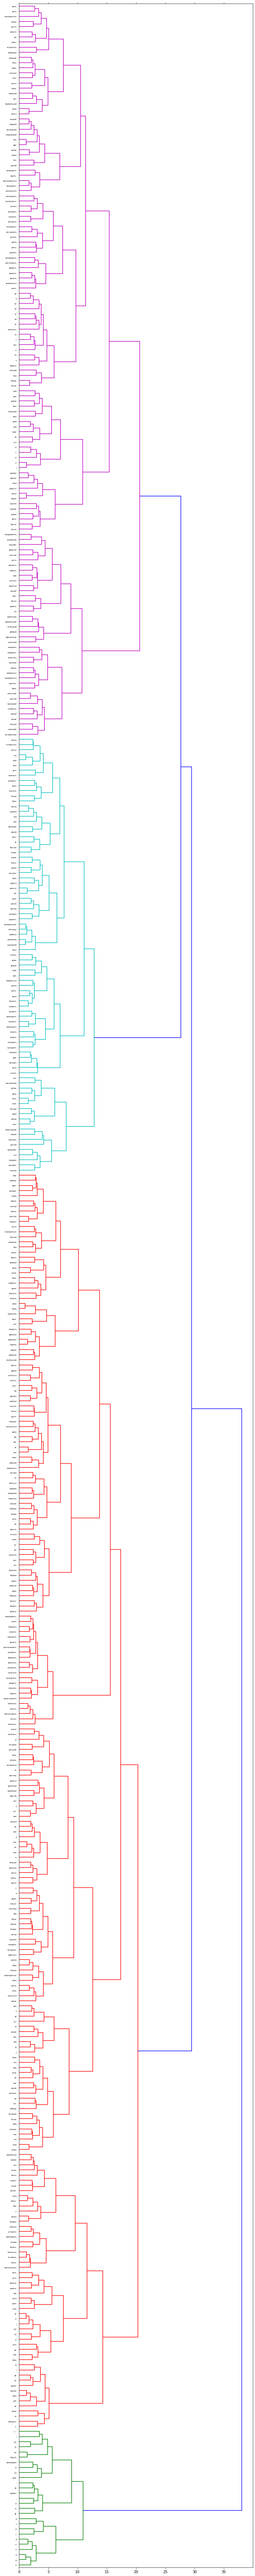

In [ ]:
from scipy.cluster.hierarchy import  ward, dendrogram

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 100)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=top_words);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

plt.savefig('w2v_cluster.png', dpi=200) #save figure as ward_clusters

## Text classification




In [ ]:
X = df.text.tolist()
y = df.sent.tolist()

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state = 42)
print ("total train examples %s" % len(y_train))
print ("total test examples %s" % len(y_test))

total train examples 151978
total test examples 74856


In [ ]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


# Tf-Idf weights


In [ ]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(w2v.popitem()[1])

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self



    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rfc_w2v = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])


In [ ]:
rfc_w2v.fit(X_train,y_train)
pred = rfc_w2v.predict(X_test)

In [ ]:
print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))
labels = rfc_w2v.classes_

classification_report
#sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
#plt.title("Confusion matrix")
#plt.show()

Precision:   0.87
Recall:   0.87
F1-measure:   0.87
Accuracy:   0.87
              precision    recall  f1-score   support

         neg       0.85      0.88      0.87     36756
         pos       0.88      0.85      0.87     38100

    accuracy                           0.87     74856
   macro avg       0.87      0.87      0.87     74856
weighted avg       0.87      0.87      0.87     74856



<function sklearn.metrics._classification.classification_report>

# Pretrained models

 https://rusvectores.org/ru/models/ 
 
